In [1]:
import os
import numpy as np
import pandas as pd
import warnings
import gdown
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#@title Чтение данных
def read_data(path, filename):
    return pd.read_csv(os.path.join(path, filename))

intel_iris_xe_anna_data = read_data('drive/MyDrive/winter_school_YADRO25/our_data', 'intel_iris_xe_anna.csv')

# Добавление названий столбцов
intel_iris_xe_anna_data.columns = ['backend', 'kernel', 'work_group_size', 'opencl_std', 'matrix_size', 'work_time' ]
intel_iris_xe_anna_data.to_csv('drive/MyDrive/winter_school_YADRO25/our_data/intel_iris_xe_anna.csv', index=False)


intel_iris_xe_anna_data['backend'] = intel_iris_xe_anna_data['backend'].str.strip()
intel_iris_xe_anna_data['opencl_std'] = intel_iris_xe_anna_data['opencl_std'].str.strip()
intel_iris_xe_anna_data = intel_iris_xe_anna_data[intel_iris_xe_anna_data['backend'] == 'myGEMM.cl']


intel_iris_xe_anna_data.head()



,backend,kernel,work_group_size,opencl_std,matrix_size,work_time
1,myGEMM.cl,1,4,-cl-std=CL2.0,512,0.00640
3,myGEMM.cl,1,4,-cl-std=CL2.0,1024,0.05288
5,myGEMM.cl,1,4,-cl-std=CL2.0,2048,0.44073
7,myGEMM.cl,1,4,-cl-std=CL2.0,4096,4.61550
8,myGEMM.cl,1,8,-cl-std=CL2.0,256,0.00094


In [5]:
#@title Подготовка данных для визуализации

k_list = sorted(intel_iris_xe_anna_data['kernel'].unique().tolist())  # собираем уникальные значения ядер
matrix_sizes_list = sorted(intel_iris_xe_anna_data['matrix_size'].unique().tolist())  # собираем уникальные значения размеров матриц
opencl_std_list = sorted(intel_iris_xe_anna_data['opencl_std'].unique().tolist())  # собираем уникальные значения стандарта openCL


 # собираем уникальные значения размеров групп для младших и старших ядер:

work_group_list_1 = sorted(intel_iris_xe_anna_data.loc[intel_iris_xe_anna_data['kernel'] == 1, 'work_group_size'].unique().tolist())
work_group_list_2 = sorted(intel_iris_xe_anna_data.loc[intel_iris_xe_anna_data['kernel'] == 3, 'work_group_size'].unique().tolist())


print('Ядра: ', *k_list)
print('Размеры матриц: ', *matrix_sizes_list)
print('Стандарты OpenCL: ', *opencl_std_list)
print('Размеры рабочих групп для младших ядер: ', *work_group_list_1)
print('Размеры рабочих групп для старших ядер: ', *work_group_list_2)


Ядра:  1 2 3 4 5 6 7
Размеры матриц:  256 512 1024 2048 4096
Стандарты OpenCL:  -cl-std=CL1.2 -cl-std=CL2.0
Размеры рабочих групп для младших ядер:  4 8 16
Размеры рабочих групп для старших ядер:  8 16 32


In [6]:
#@title Собираем данные для построения графиков времени работы от размера матрицы при фиксированных OpenCL стандартах и размерах групп

# OpenCL std = 1.2, wgs = 8

x_ = matrix_sizes_list  # значения абсциссы
y_1_8 = []  # значения ординаты для каждого ядра
y_2_8 = []  # OpenCL std = 2, wgs = 8

y_1_16 = []
y_2_16 = []

for k in k_list:
  temp1 = []
  temp2 = []
  temp3 = []
  temp4 = []

  for ms in x_:
    temp1.append(float(intel_iris_xe_anna_data[(intel_iris_xe_anna_data['kernel'] == k) & (intel_iris_xe_anna_data['opencl_std'] == opencl_std_list[0]) & (intel_iris_xe_anna_data['work_group_size'] == 8) & (intel_iris_xe_anna_data['matrix_size'] == ms)]['work_time']))
    temp2.append(float(intel_iris_xe_anna_data[(intel_iris_xe_anna_data['kernel'] == k) & (intel_iris_xe_anna_data['opencl_std'] == opencl_std_list[1]) & (intel_iris_xe_anna_data['work_group_size'] == 8) & (intel_iris_xe_anna_data['matrix_size'] == ms)]['work_time']))
    temp3.append(float(intel_iris_xe_anna_data[(intel_iris_xe_anna_data['kernel'] == k) & (intel_iris_xe_anna_data['opencl_std'] == opencl_std_list[0]) & (intel_iris_xe_anna_data['work_group_size'] == 16) & (intel_iris_xe_anna_data['matrix_size'] == ms)]['work_time']))
    temp4.append(float(intel_iris_xe_anna_data[(intel_iris_xe_anna_data['kernel'] == k) & (intel_iris_xe_anna_data['opencl_std'] == opencl_std_list[1]) & (intel_iris_xe_anna_data['work_group_size'] == 16) & (intel_iris_xe_anna_data['matrix_size'] == ms)]['work_time']))



  y_1_8.append(temp1)
  y_2_8.append(temp2)
  y_1_16.append(temp3)
  y_2_16.append(temp4)










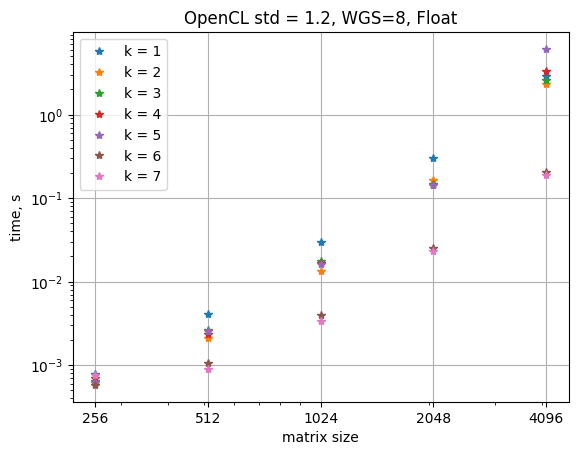

In [7]:
#@title График при OpenCL std = 1.2, WGS = 8
import matplotlib.pyplot as plt

for i in range(len(k_list)):
  lab_name = 'k = ' + str(i + 1)
  plt.plot(x_, y_1_8[i], '*', label=lab_name)

plt.xlabel('matrix size')
plt.ylabel('time, s')
plt.title('OpenCL std = 1.2, WGS=8, Float')
plt.yscale('log')
plt.xscale('log')
plt.xticks(x_, x_)
plt.grid()
plt.legend()

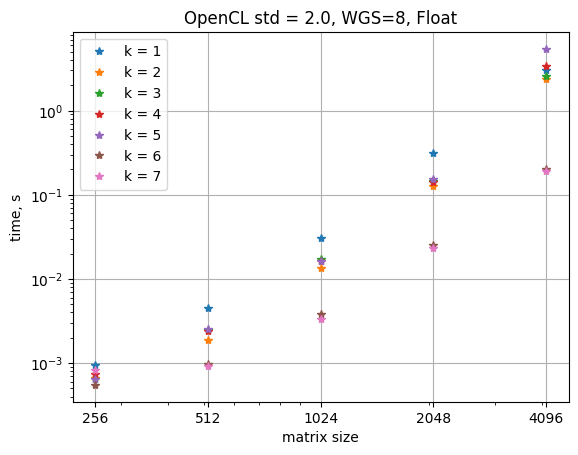

In [8]:
#@title График при OpenCL std = 2.0, WGS = 8
for i in range(len(k_list)):
  lab_name = 'k = ' + str(i + 1)
  plt.plot(x_, y_2_8[i], '*', label=lab_name)

plt.xlabel('matrix size')
plt.ylabel('time, s')
plt.title('OpenCL std = 2.0, WGS=8, Float')
plt.yscale('log')
plt.xscale('log')
plt.xticks(x_, x_)
plt.grid()
plt.legend()

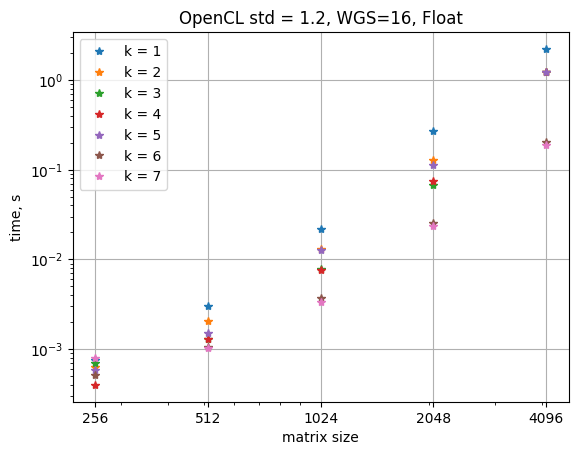

In [9]:
#@title График при OpenCL std = 1.2, WGS = 16
for i in range(len(k_list)):
  lab_name = 'k = ' + str(i + 1)
  plt.plot(x_, y_1_16[i], '*', label=lab_name)

plt.xlabel('matrix size')
plt.ylabel('time, s')
plt.title('OpenCL std = 1.2, WGS=16, Float')
plt.yscale('log')
plt.xscale('log')
plt.xticks(x_, x_)
plt.grid()
plt.legend()

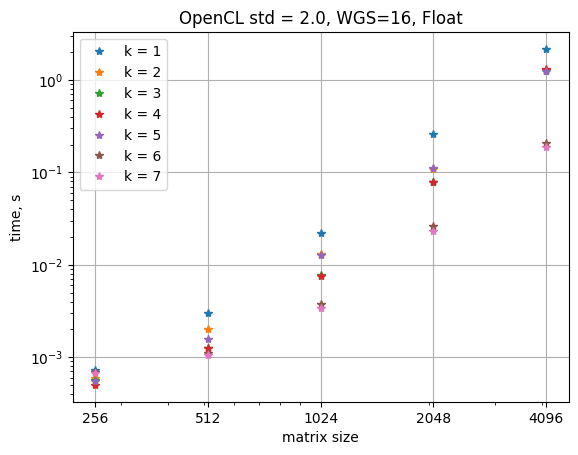

In [10]:
#@title График при OpenCL std = 2.0, WGS = 16
for i in range(len(k_list)):
  lab_name = 'k = ' + str(i + 1)
  plt.plot(x_, y_2_16[i], '*', label=lab_name)

plt.xlabel('matrix size')
plt.ylabel('time, s')
plt.title('OpenCL std = 2.0, WGS=16, Float')
plt.yscale('log')
plt.xscale('log')
plt.xticks(x_, x_)
plt.grid()
plt.legend()

In [11]:
#@title Подготовка данных для построения графиков зависимости времени выполнения от размера матрицы, при фиксированном ядре и разных размерах рабочих групп

#  ядро 4, OpenCL std = 1.2

y_1_4 = []  # значения ординаты для каждого wgs
y_2_4 = []

for wgs in work_group_list_2:
  temp1 = []
  temp2 = []

  for ms in x_:
    temp1.append(float(intel_iris_xe_anna_data[(intel_iris_xe_anna_data['kernel'] == 4) & (intel_iris_xe_anna_data['opencl_std'] == opencl_std_list[0]) & (intel_iris_xe_anna_data['work_group_size'] == wgs) & (intel_iris_xe_anna_data['matrix_size'] == ms)]['work_time']))
    temp2.append(float(intel_iris_xe_anna_data[(intel_iris_xe_anna_data['kernel'] == 4) & (intel_iris_xe_anna_data['opencl_std'] == opencl_std_list[1]) & (intel_iris_xe_anna_data['work_group_size'] == wgs) & (intel_iris_xe_anna_data['matrix_size'] == ms)]['work_time']))

  y_1_4.append(temp1)
  y_2_4.append(temp2)


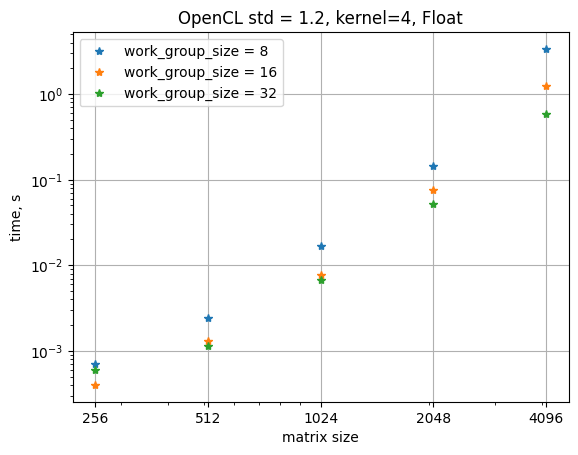

In [12]:
#@title График при OpenCL std = 1.2, kernel = 4

for i in range(len(work_group_list_2)):
  lab_name = 'work_group_size = ' + str(work_group_list_2[i])
  plt.plot(x_, y_1_4[i], '*', label=lab_name)

plt.xlabel('matrix size')
plt.ylabel('time, s')
plt.title('OpenCL std = 1.2, kernel=4, Float')
plt.yscale('log')
plt.xscale('log')
plt.xticks(x_, x_)
plt.grid()
plt.legend()

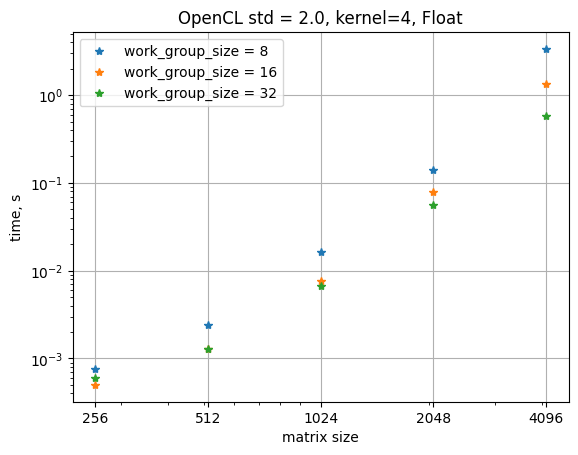

In [13]:
#@title График при OpenCL std = 2.0, kernel = 4

for i in range(len(work_group_list_2)):
  lab_name = 'work_group_size = ' + str(work_group_list_2[i])
  plt.plot(x_, y_2_4[i], '*', label=lab_name)

plt.xlabel('matrix size')
plt.ylabel('time, s')
plt.title('OpenCL std = 2.0, kernel=4, Float')
plt.yscale('log')
plt.xscale('log')
plt.xticks(x_, x_)
plt.grid()
plt.legend()

In [14]:
#@title Подготавливаем данные для статистического анализа

intel_iris_xe_stat_data = read_data('drive/MyDrive/winter_school_YADRO25/our_data', 'intel_iris_xe_stat_data.csv')

# Добавление названий столбцов
intel_iris_xe_stat_data.columns = ['backend', 'kernel', 'work_group_size', 'opencl_std', 'matrix_size', 'work_time' ]
intel_iris_xe_stat_data.to_csv('drive/MyDrive/winter_school_YADRO25/our_data/intel_iris_xe_stat_data.csv', index=False)


intel_iris_xe_stat_data['backend'] = intel_iris_xe_stat_data['backend'].str.strip()
intel_iris_xe_stat_data['opencl_std'] = intel_iris_xe_stat_data['opencl_std'].str.strip()
intel_iris_xe_stat_data_1 = intel_iris_xe_stat_data[(intel_iris_xe_stat_data['backend'] == 'myGEMM.cl') & (intel_iris_xe_stat_data['matrix_size'] == 2048)]
stat_group = intel_iris_xe_stat_data_1['work_time']
stat_group


,work_time
5,0.06346
14,0.06349
23,0.06963
32,0.06362
41,0.07911
...,...
860,0.07466
869,0.06297
878,0.06422
887,0.06663


In [50]:
import seaborn as sns
'''
data_1024 = intel_iris_xe_stat_data[(intel_iris_xe_stat_data['backend'] == 'myGEMM.cl') & (intel_iris_xe_stat_data['matrix_size'] == 1024)]['work_time'].to_numpy()
data_2048 = intel_iris_xe_stat_data[(intel_iris_xe_stat_data['backend'] == 'myGEMM.cl') & (intel_iris_xe_stat_data['matrix_size'] == 2048)]['work_time'].to_numpy()
data_4096 = intel_iris_xe_stat_data[(intel_iris_xe_stat_data['backend'] == 'myGEMM.cl') & (intel_iris_xe_stat_data['matrix_size'] == 4096)]['work_time'].to_numpy()

boxpl = []
boxpl.append(data_1024)
boxpl.append(data_2048)
boxpl.append(data_4096)

data_1024
'''

"\ndata_1024 = intel_iris_xe_stat_data[(intel_iris_xe_stat_data['backend'] == 'myGEMM.cl') & (intel_iris_xe_stat_data['matrix_size'] == 1024)]['work_time'].to_numpy()\ndata_2048 = intel_iris_xe_stat_data[(intel_iris_xe_stat_data['backend'] == 'myGEMM.cl') & (intel_iris_xe_stat_data['matrix_size'] == 2048)]['work_time'].to_numpy()\ndata_4096 = intel_iris_xe_stat_data[(intel_iris_xe_stat_data['backend'] == 'myGEMM.cl') & (intel_iris_xe_stat_data['matrix_size'] == 4096)]['work_time'].to_numpy()\n\nboxpl = []\nboxpl.append(data_1024)\nboxpl.append(data_2048)\nboxpl.append(data_4096)\n\ndata_1024\n"

In [18]:
#@title Вычисление мер центральной тенденции

print('\u001b[36;1mВыборочное среднее:\u001b[34;1m',stat_group.mean(),'\u001b[0m')
print('-------------------------------------------------------')
print('\u001b[36;1mМедиана:\u001b[34;1m', stat_group.median(),'\u001b[0m')
print('-------------------------------------------------------')
print('\u001b[36;1mМода:\u001b[34;1m', stat_group.mode().iloc[0],'\u001b[0m')
print('-------------------------------------------------------')


Выборочное среднее: 0.068158 
-------------------------------------------------------
Медиана: 0.06489 
-------------------------------------------------------
Мода: 0.06241 
-------------------------------------------------------


In [19]:
#@title Вычисление мер разброса


variance = stat_group.var()   # Дисперсия
std_dev = stat_group.std()   # Среднеквадратичное отклонение
min_value = stat_group.min()   # Min-value
max_value = stat_group.max()   # Max-value
IQR = stat_group.quantile(0.75) - stat_group.quantile(0.25)   # IQR

print('\u001b[36;1mДисперсия:\u001b[34;1m', variance,'\u001b[0m')
print('-------------------------------------------------------')
print('\u001b[36;1mСреднеквадратичное отклонение:\u001b[34;1m', std_dev,'\u001b[0m')
print('-------------------------------------------------------')
print('\u001b[36;1mMin-value:\u001b[34;1m', min_value,'\u001b[0m')
print('-------------------------------------------------------')
print('\u001b[36;1mMax-value:\u001b[34;1m', max_value,'\u001b[0m')
print('-------------------------------------------------------')
print('\u001b[36;1mIQR:\u001b[34;1m', IQR,'\u001b[0m')
print('-------------------------------------------------------')

Дисперсия: 7.361408686868685e-05 
-------------------------------------------------------
Среднеквадратичное отклонение: 0.008579865201079027 
-------------------------------------------------------
Min-value: 0.06186 
-------------------------------------------------------
Max-value: 0.11481 
-------------------------------------------------------
IQR: 0.005604999999999999 
-------------------------------------------------------


In [20]:
#@title Вычисление параметров формы распределений каждого признака.

from scipy.stats import skew, kurtosis


print('\u001b[36;1mАсимметрия  Эксцесс\u001b[0m')
print('---------------------------')

print(' \u001b[34;1m', round(skew(stat_group), 3),' ', round(kurtosis(stat_group), 3),'\u001b[0m')

Асимметрия  Эксцесс
---------------------------
  3.046   11.106 


<Axes: xlabel='work_time', ylabel='Count'>

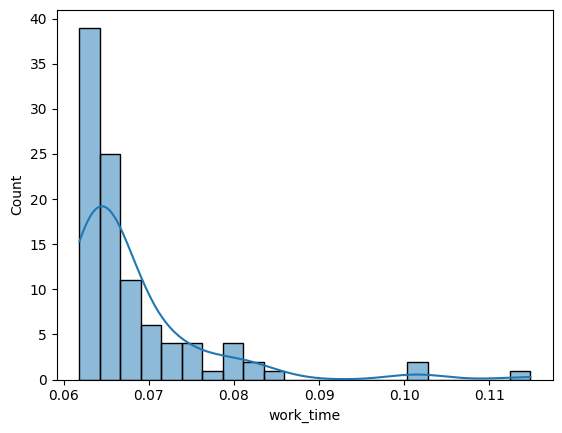

In [21]:
#@title Построение гистограммы, а также KDE (ядерная оценка плотности вероятности).
import matplotlib.pyplot as plt


#sns.histplot(stat_group, stat='density', kde=True)
sns.histplot(stat_group, stat='count', kde=True)

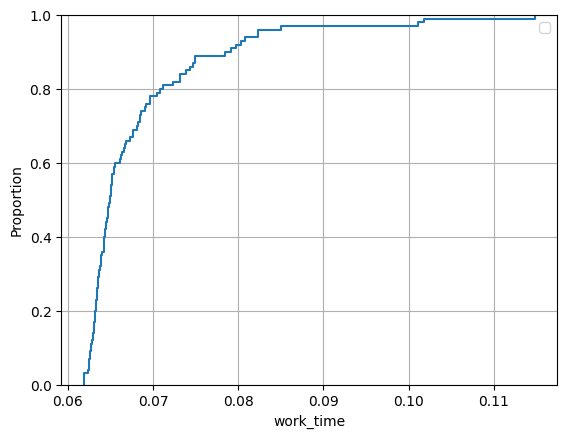

In [22]:
# ECDF

sns.ecdfplot(stat_group)

plt.grid('on')
plt.legend()
plt.show()

In [23]:
#@title Выгрузка больших объемов данных для анализа статистики

iris_big_data = read_data('drive/MyDrive/winter_school_YADRO25/our_data', 'intel_iris_xe_big_data.csv')


In [48]:
#@title Функции для обработки больших объемов данных для анализа статистики
sns.set(style="whitegrid")


def load_data():

    df = read_data('drive/MyDrive/winter_school_YADRO25/our_data', 'intel_iris_xe_big_data.csv')
    df.columns = ['backend', 'kernel', 'work_group_size', 'opencl_std', 'matrix_size', 'work_time' ]
    df.columns = df.columns.str.strip()
    df = df[df['backend'] == 'myGEMM.cl']

    df['matrix_size'] = pd.to_numeric(df['matrix_size'], errors='coerce')
    df['work_time'] = pd.to_numeric(df['work_time'], errors='coerce')
    df['work_group_size'] = pd.to_numeric(df['work_group_size'], errors='coerce')

    return df

def plot_performance_by_kernel_fixed_matrix(df, fixed_matrix_dim):

    df_fixed = df[df['matrix_size'] == fixed_matrix_dim]

    if df_fixed.empty:
        print(f"Нет данных для matrix_dimensions = {fixed_matrix_dim}")
        return

    # Сортируем рабочие группы для правильного порядка в легенде
    work_groups = sorted(df_fixed['work_group_size'].unique())

    plt.figure(figsize=(12, 8))
    ax = sns.boxplot(
        data=df_fixed,
        x='kernel',
        y='work_time',
        hue='work_group_size',
        palette='Set1',
        hue_order=work_groups
    )

    ax.set_title(f"Распределение времени выполнения по ядрам (matrix_dimensions = {fixed_matrix_dim})")
    ax.set_xlabel("Выбранное ядро")
    ax.set_ylabel("Время выполнения (s)")
    plt.legend(title="Work Group Size", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

def plot_performance_by_kernel_vs_wgs(df, fixed_matrix_dim):

    # Фильтруем данные для заданного размера матрицы
    df_fixed = df[df['matrix_size'] == fixed_matrix_dim]
    df_aggregated = df_fixed.groupby(['work_group_size', 'kernel'], as_index=False)['work_time'].median()

    if df_fixed.empty:
        print(f"Нет данных для matrix_dimensions = {fixed_matrix_dim}")
        return

    plt.figure(figsize=(12, 8))
    '''
    ax = sns.lineplot(
        data=df_aggregated,
        x='work_group_size',
        y='work_time',
        hue='kernel',
        style='kernel',
        markers=True,
        dashes=False,
        palette='Set1',
        markersize=10,
        errorbar=None,
        # ниже параметры, чтобы оставить только точки, без линий
        size='kernel',
        sizes=(0, 0)
    )
    '''
    ax = sns.scatterplot(
      data=df_aggregated,
      x='work_group_size',
      y='work_time',
      hue='kernel',
      style='kernel',
      palette='Set1',
      s=100,  # Размер маркеров
      edgecolor='none',  # Убираем обводку маркеров
      legend='full'
    )


    ax.set_title(f"Зависимость времени выполнения от Work Group Size (matrix_dimensions = {fixed_matrix_dim})")
    ax.set_xlabel("Work Group Size")
    ax.set_ylabel("Среднее время выполнения (s)")
    plt.legend(title="Выбранное ядро", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


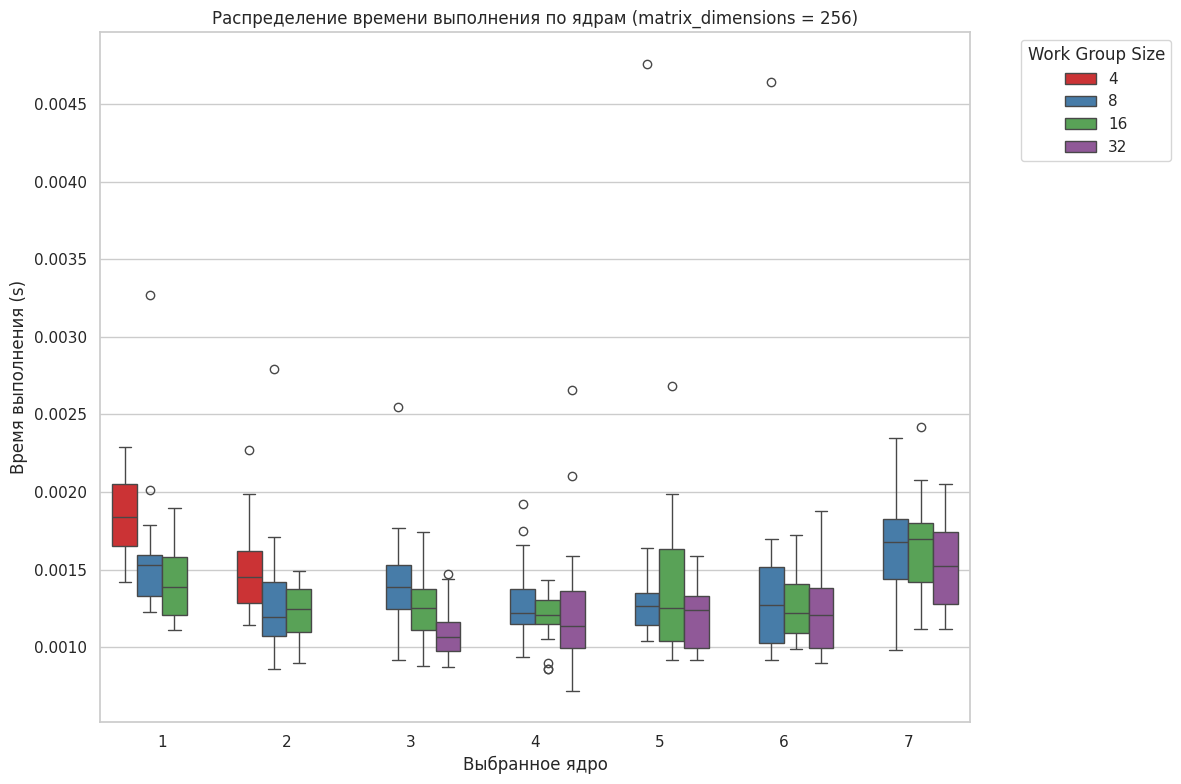

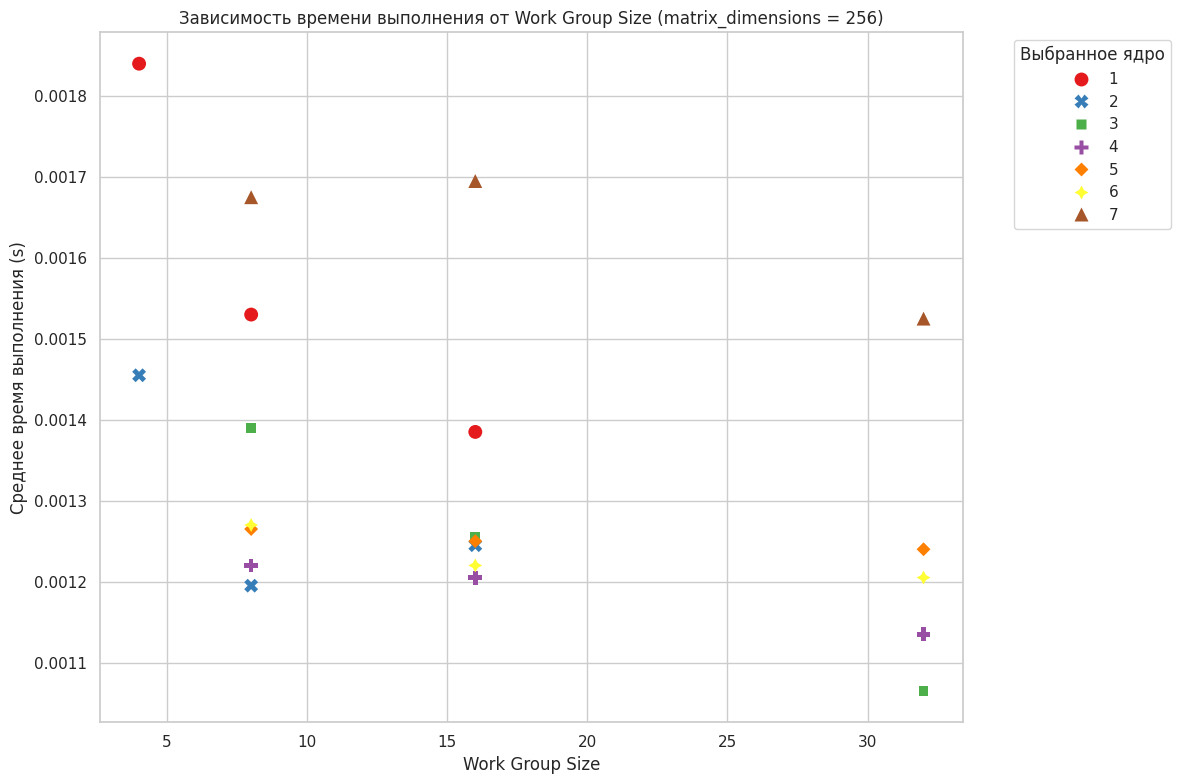

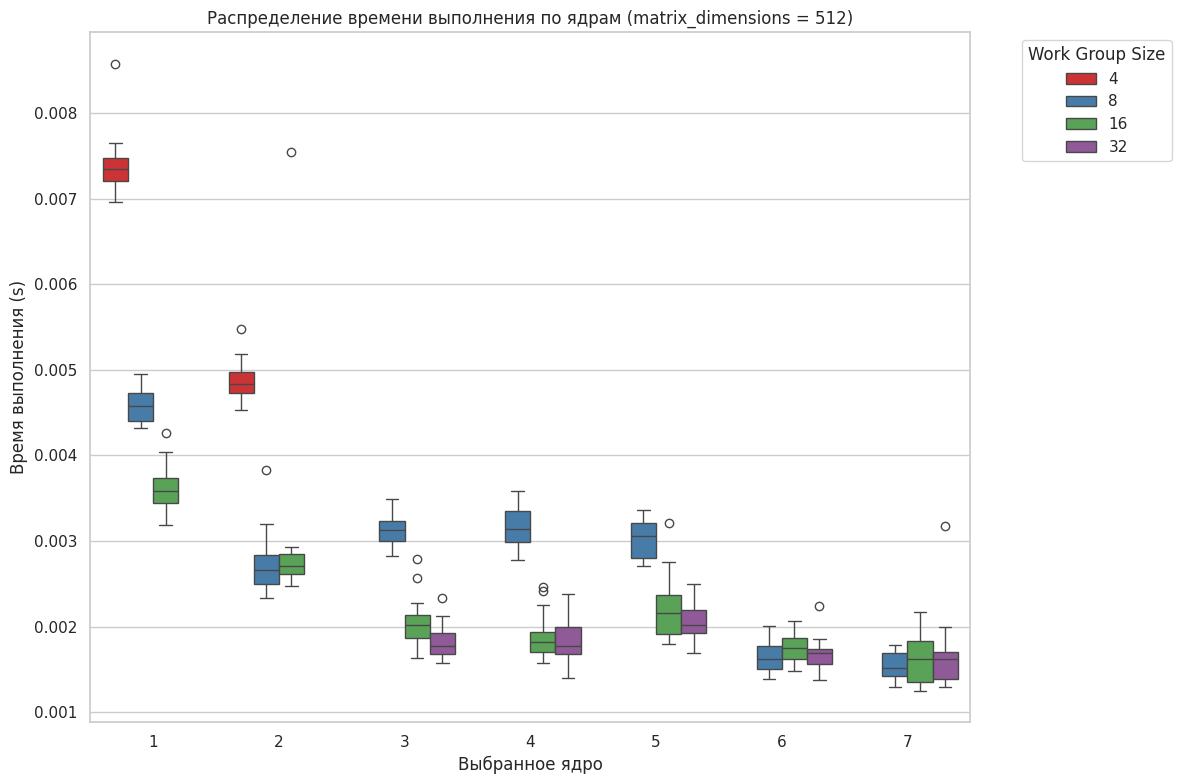

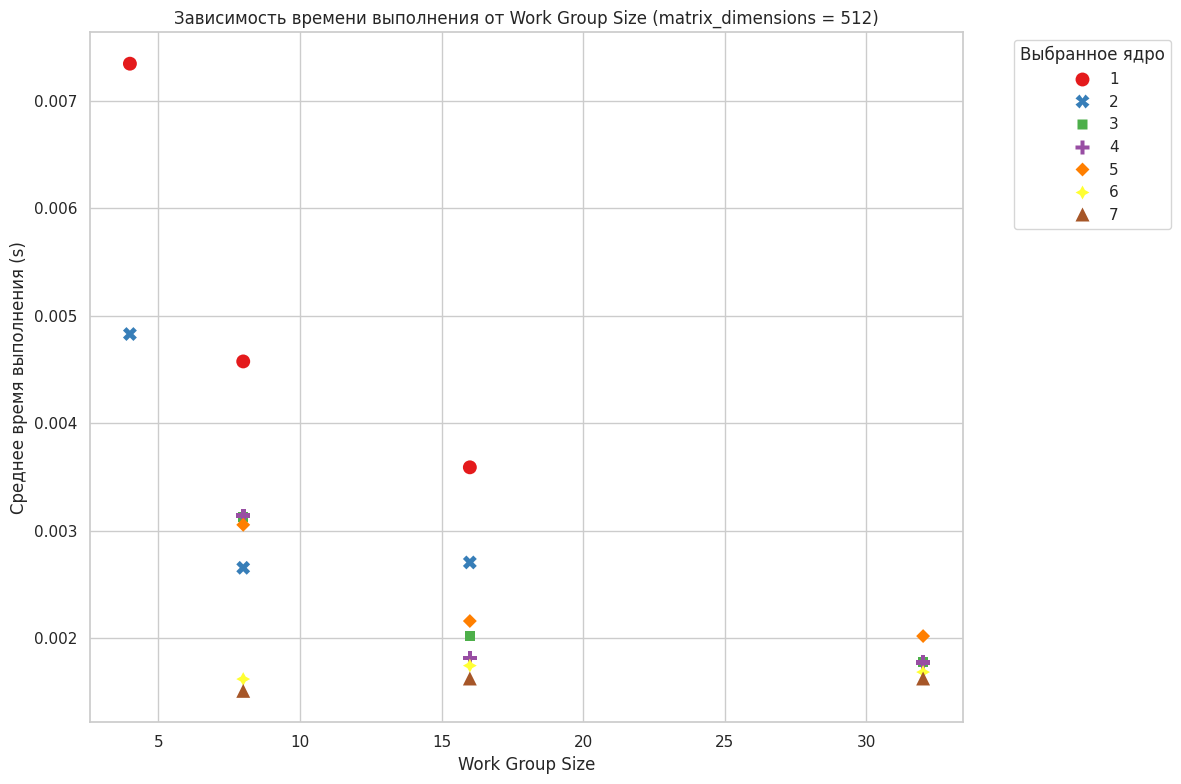

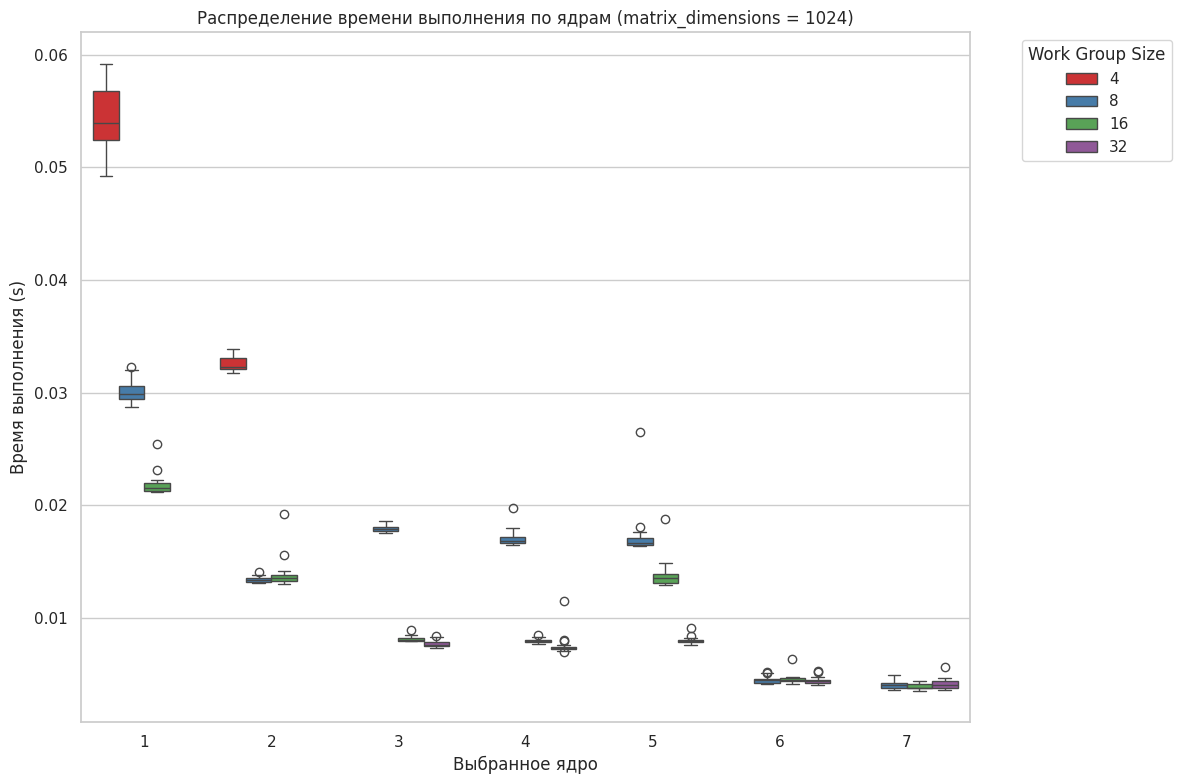

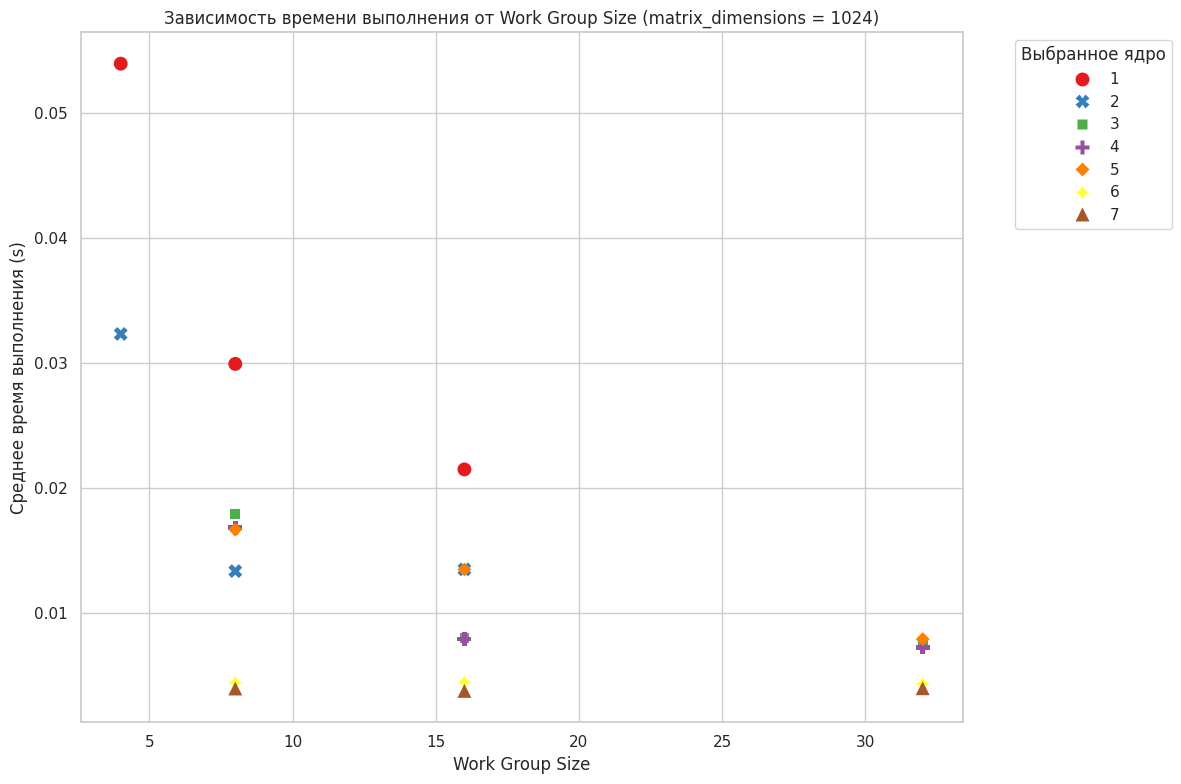

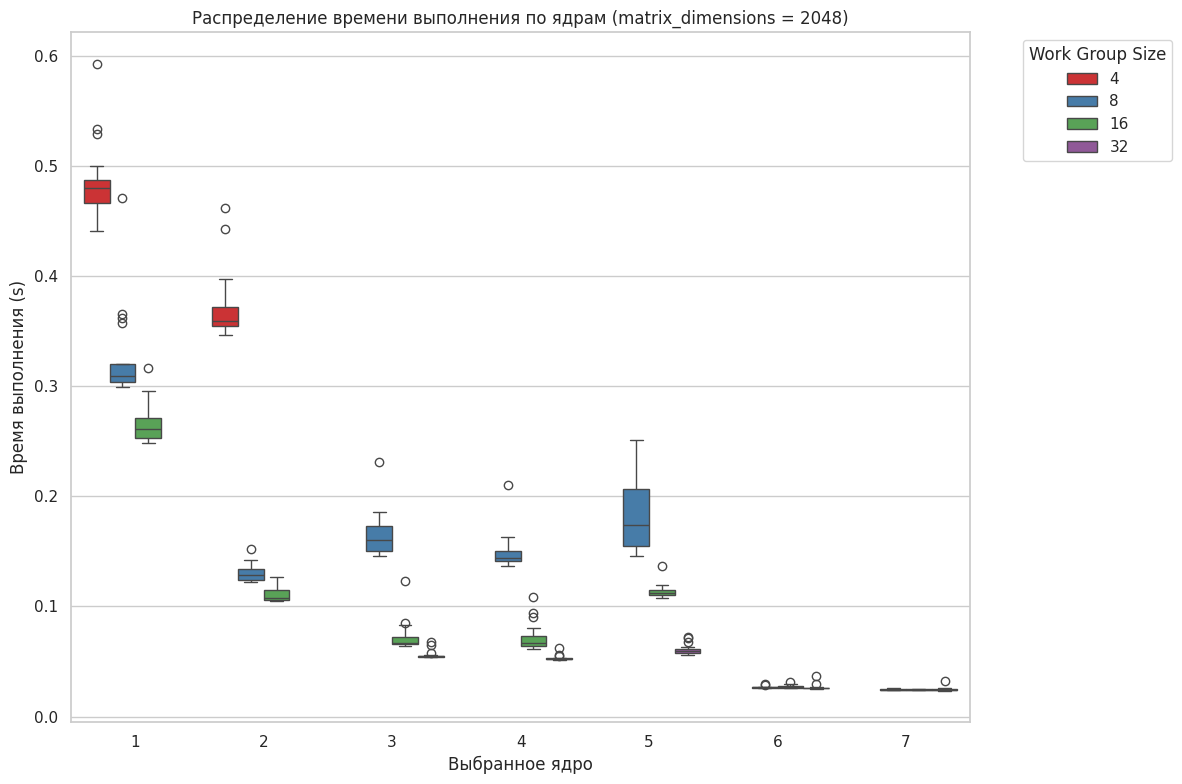

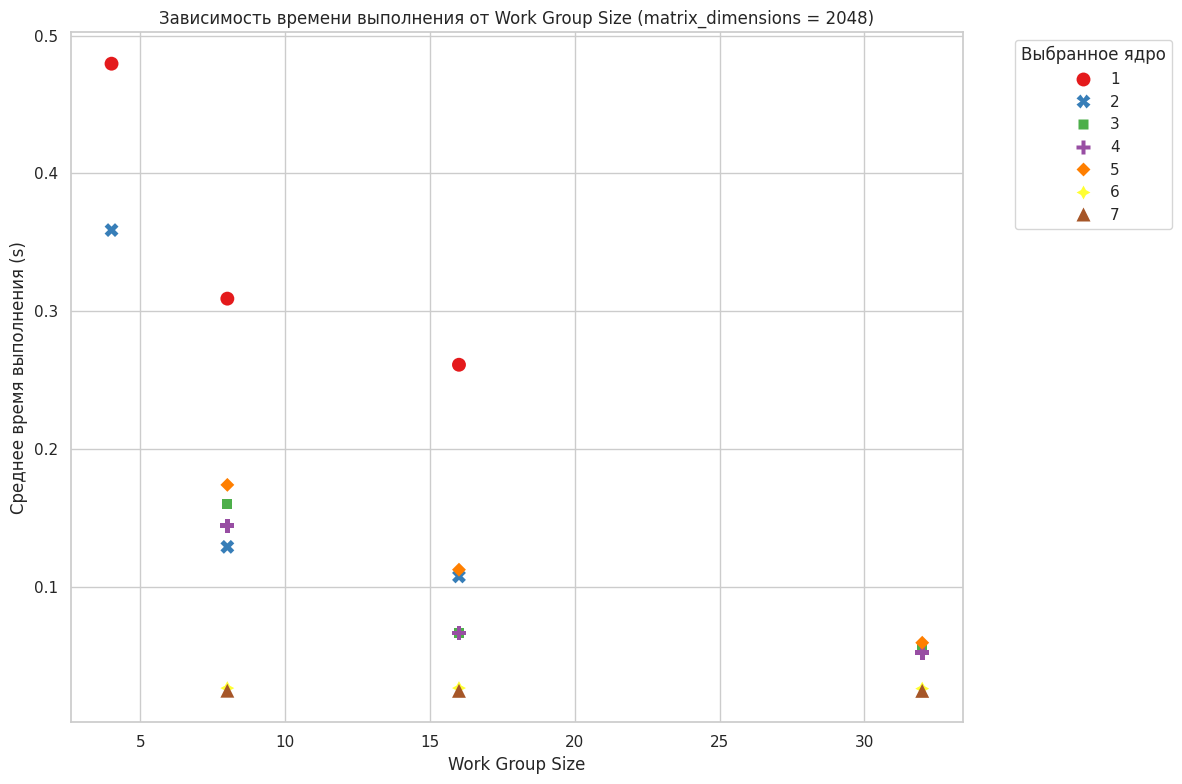

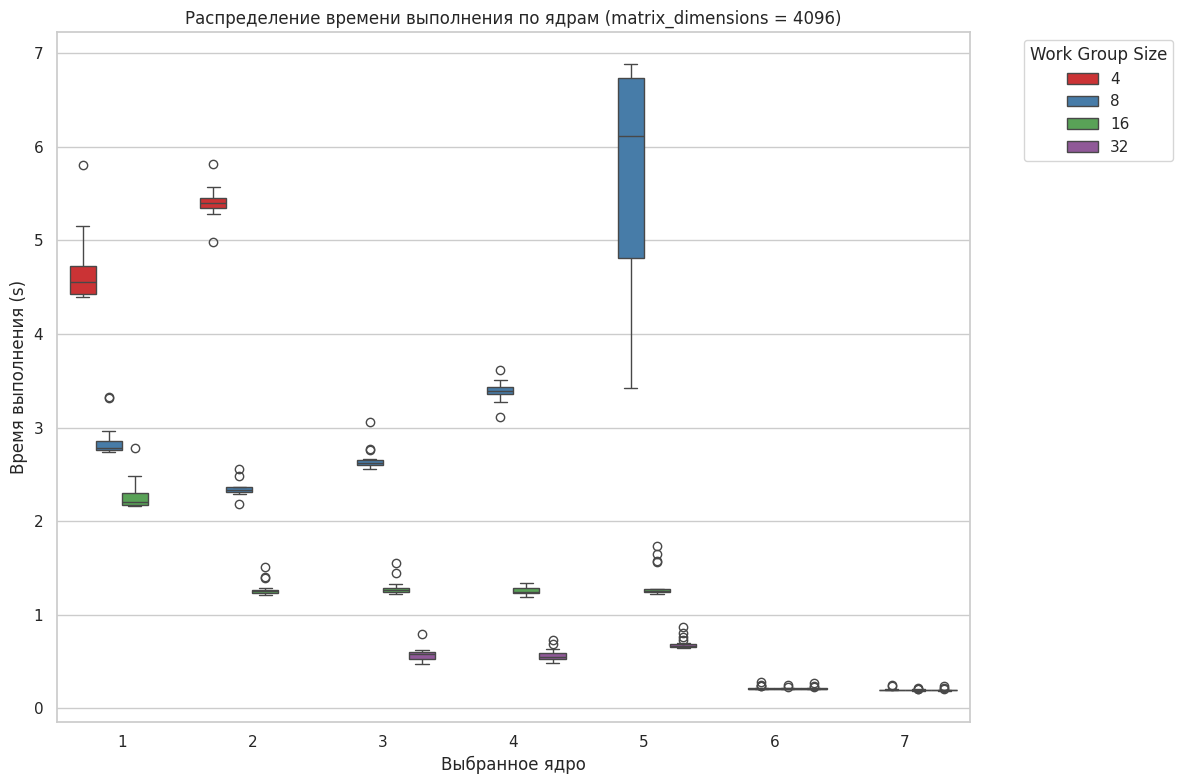

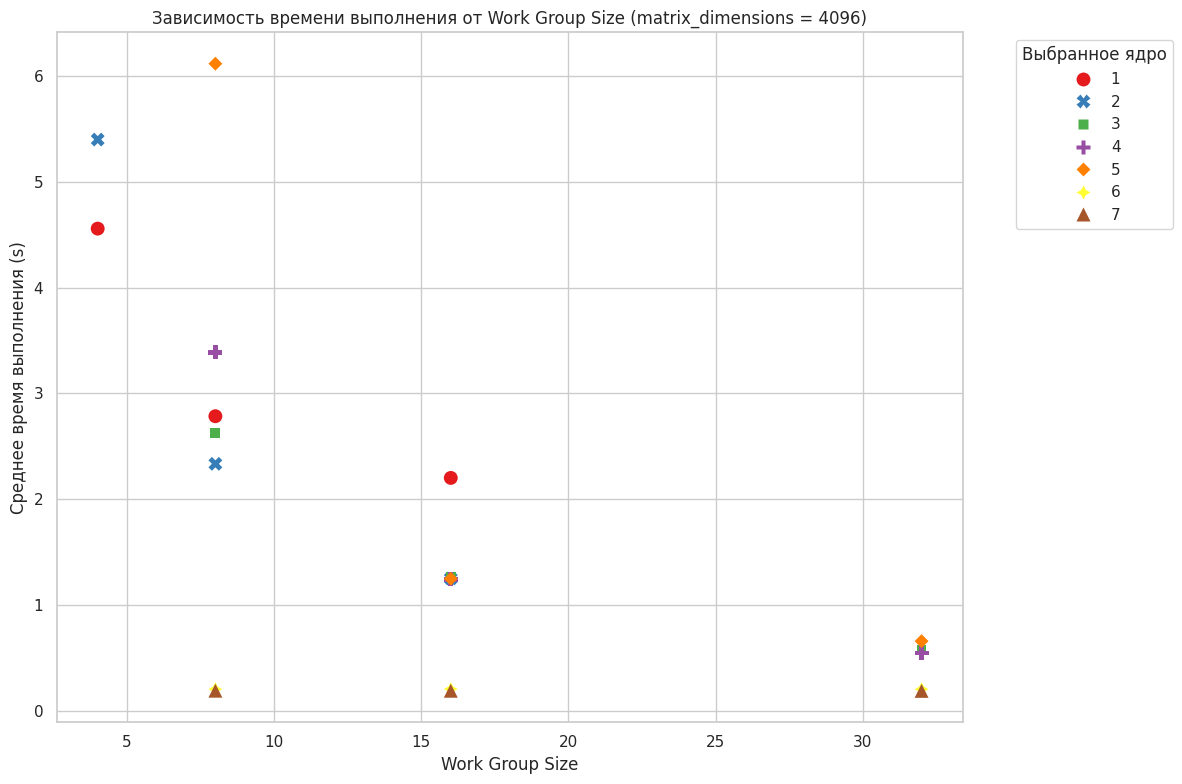

In [49]:
#@title Построение графиков (TO DO: собрать графики в файлы)

file_path = '/content/output.csv'

df = load_data()
matrix_dims = df['matrix_size'].unique()

for dim in sorted(matrix_dims):
    plot_performance_by_kernel_fixed_matrix(df, dim)
    plot_performance_by_kernel_vs_wgs(df, dim)